In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# import library
import pandas as pd
import root_to_df as lib_root

# load the class RootToPdf
url_root="tag_1_delphes_events_PPMUMU.root" # url to root file
rtf=lib_root.RootToPdf(path=url_root,tree_name="Delphes")

#define branch

branch=["Muon.PT","Muon.Eta","Muon.Phi","Muon.Charge","Muon_size"]


# conver branch
df1=rtf.extract_df_branch(branch,2)

In [51]:
df1

muon_pt0   muon_pt1  muon_eta0  muon_eta1  muon_phi0  muon_phi1  \
0      18.817617  11.992957   1.557614   1.870072  -1.317018   0.773446   
1      31.649843  29.899940   0.197941  -1.630549   0.641532  -2.358496   
2      28.873955        NaN   0.997635        NaN  -0.812266        NaN   
3      59.515984  35.268829   1.294336   1.741358   2.320672  -0.122418   
4      43.179703  41.226093  -0.507049  -0.281861   2.778274  -0.375370   
...          ...        ...        ...        ...        ...        ...   
49995  11.438158        NaN   1.563129        NaN  -0.814608        NaN   
49996  50.725731        NaN   1.253999        NaN  -2.066896        NaN   
49997  31.939379        NaN   1.214945        NaN   2.715611        NaN   
49998  35.115616        NaN   0.381308        NaN  -1.261945        NaN   
49999  52.880947  32.856228   0.677995   1.115016   1.402213  -1.864658   

       muon_charge0  muon_charge1  muon_size  Invariant_mass  
0               1.0          -1.0          2       26.414224  
1              -1.0           1.0          2       88.972799  
2               1.0           NaN          1             NaN  
3              -1.0           1.0          2       88.541187  
4               1.0          -1.0          2       84.917108  
...             ...           ...        ...             ...  
49995          -1.0           NaN          1             NaN  
49996           1.0           NaN          1             NaN  
49997           1.0           NaN          1             NaN  
49998          -1.0           NaN          1             NaN  
49999           1.0          -1.0          2       85.204398  

[50000 rows x 10 columns]

In [ ]:
df1["Muon_pt"]=df1["muon_pt0"]+df1["muon_pt1"]

In [36]:
#df_root

In [37]:
#df1=df_root.query("muon_charge0*muon_charge1==-1.0 & muon_size ==2")
#df1
#df1.head(100)

In [38]:
def invariant_mass(df):
    m= np.sqrt(2*df["muon_pt0"]*df["muon_pt1"]*(np.cosh(df["muon_eta0"]-df["muon_eta1"])-\
                                                    np.cos(df["muon_phi0"]-df["muon_phi1"])))
    return m

In [39]:
df1["Invariant_mass"]=df1.apply(invariant_mass,axis=1)

In [40]:
df1

muon_pt0   muon_pt1  muon_eta0  muon_eta1  muon_phi0  muon_phi1  \
0      18.817617  11.992957   1.557614   1.870072  -1.317018   0.773446   
1      31.649843  29.899940   0.197941  -1.630549   0.641532  -2.358496   
2      28.873955        NaN   0.997635        NaN  -0.812266        NaN   
3      59.515984  35.268829   1.294336   1.741358   2.320672  -0.122418   
4      43.179703  41.226093  -0.507049  -0.281861   2.778274  -0.375370   
...          ...        ...        ...        ...        ...        ...   
49995  11.438158        NaN   1.563129        NaN  -0.814608        NaN   
49996  50.725731        NaN   1.253999        NaN  -2.066896        NaN   
49997  31.939379        NaN   1.214945        NaN   2.715611        NaN   
49998  35.115616        NaN   0.381308        NaN  -1.261945        NaN   
49999  52.880947  32.856228   0.677995   1.115016   1.402213  -1.864658   

       muon_charge0  muon_charge1  muon_size  Invariant_mass  
0               1.0          -1.0          2       26.414224  
1              -1.0           1.0          2       88.972799  
2               1.0           NaN          1             NaN  
3              -1.0           1.0          2       88.541187  
4               1.0          -1.0          2       84.917108  
...             ...           ...        ...             ...  
49995          -1.0           NaN          1             NaN  
49996           1.0           NaN          1             NaN  
49997           1.0           NaN          1             NaN  
49998          -1.0           NaN          1             NaN  
49999           1.0          -1.0          2       85.204398  

[50000 rows x 10 columns]

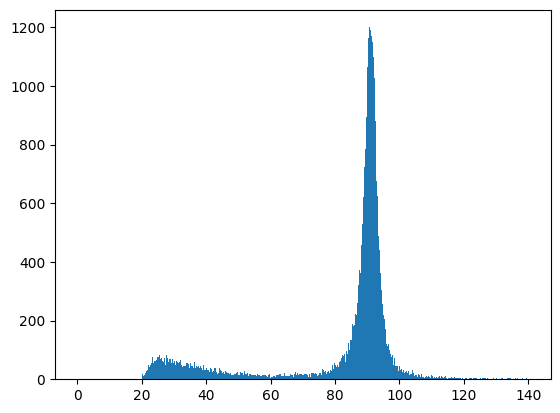

In [50]:
rango=np.linspace(0,140,500)
plt.hist(df1["Invariant_mass"],bins=rango);
#plt.ylim(0,1500)

In [42]:
mean_value=df1["Invariant_mass"].mean()
des_value=df1["Invariant_mass"].std()
print(mean_value,des_value)

82.29594961215871 23.34805286287366
